<h1>Encoding of features in Machine Learning</h1> 

<i><b>In Machine Learning, encoding is a process of converting any kind of data into a machine readable format : vector, binary etc.</b></i>

    While Solving ml problems we come accross many categories of data such as numerical, categorical, text, image etc. 
    Before fitting the features into a machine learning model we have to encode these features into numbers or vectors. 
    There are several ways to do it and we are going to learn each encoding method one by one.
  
<i>Note: For analysis we are going to use the titanic dataset provided by Kaggle.</i>



In [33]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df["Age"] = df["Age"].dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Age  : Range : {} and {}".format(min(df["Age"]),max(df["Age"])))
print("Fare : Range : {} and {}.".format(min(df["Fare"]),max(df["Fare"])))

Age  : Range : 0.42 and 80.0
Fare : Range : 0.0 and 512.3292.


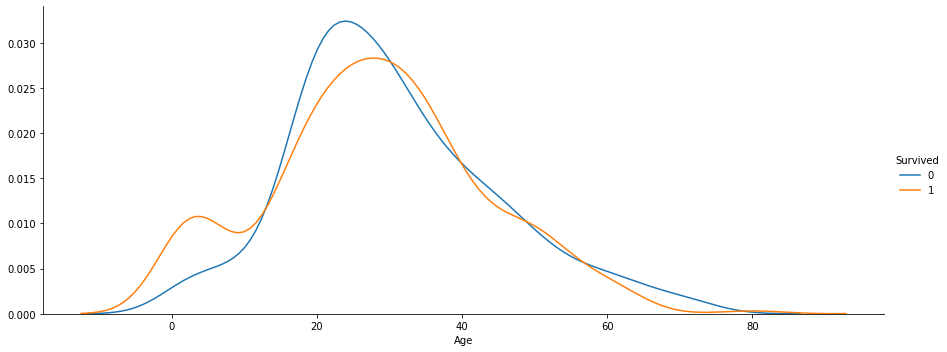

In [4]:
#age kde plot
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "Age").add_legend()

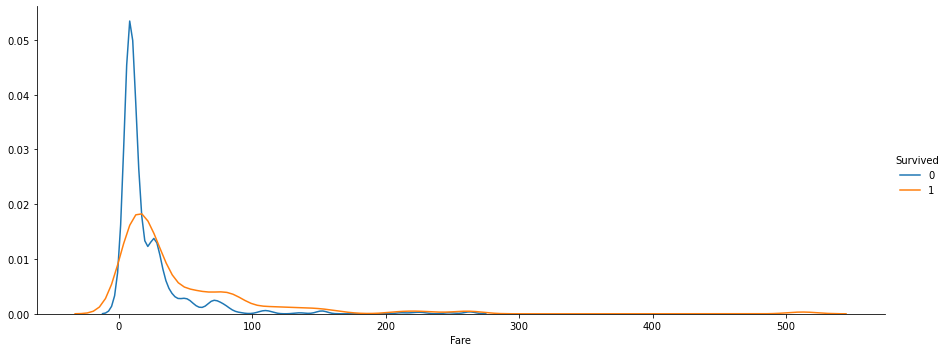

In [5]:
#fare kde plot
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "Fare").add_legend()

<h3>1. Numerical</h3>

    Numerical features are very common incase of regression and forecasting problems. These kind of dataset contains 
    features that highly vary in magnitudes, units, and range. The algorithms which use Euclidean Distance measure are
    sensitive to Magnitudes. Here encoding helps to weigh all the features equally.

    The range of Age, and Fare is between (0.42, 80.0) and (0.0, 512.3292). Both have initial range below 1, but the 
    boundry value is very different. As the features can vary differently in a dataset we have apply a technique to bring
    them into a common range. This technique is called feature scaling. Some of the feature scaling techniques are:


<h4><i>a. Normalization</i></h4>

Why?

    Goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting 
    differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

When?

    Normalization is a good technique to use when you do not know the distribution of your data or when you know the
    distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the 
    algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors 
    and artificial neural networks.
    
Technique?

    Min-Max Scaler:
        In this approach, the data is scaled to a fixed range — usually 0 to 1.
        A Min-Max scaling is typically done via the following equation:
                        X_norm = (X - X_min)/(X_max - x_min) 

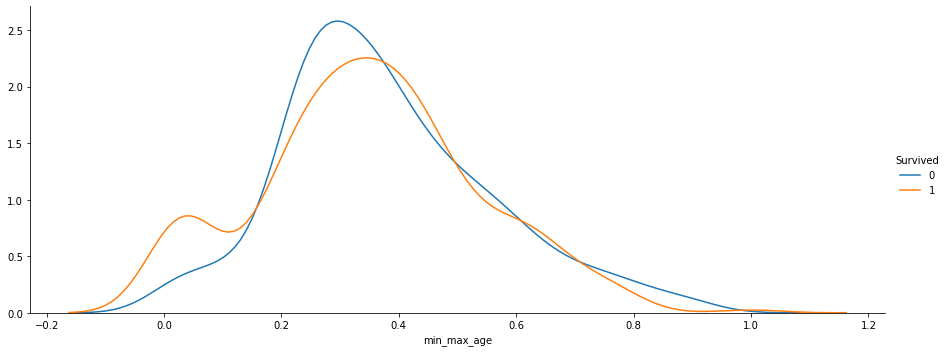

In [6]:
#manually applying min-max scaler
df['min_max_age'] = [(i-0.42)/(80.0-0.42) for i in df["Age"].values]
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "min_max_age").add_legend()

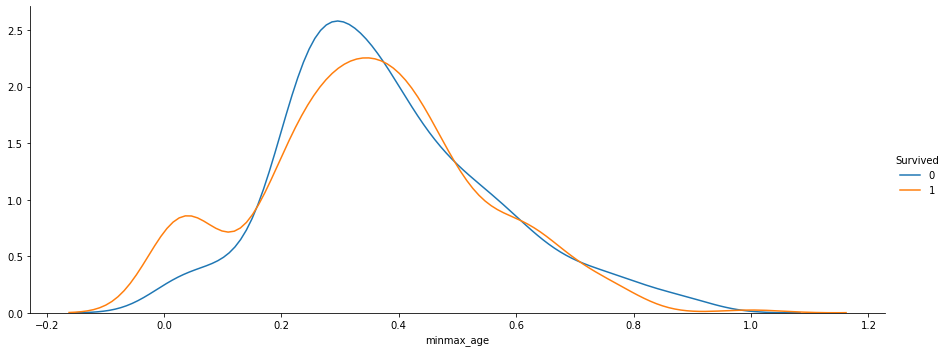

In [7]:
#using sklearn min_max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df["minmax_age"] = scaler.fit_transform(df["Age"].values.reshape(-1,1))
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "minmax_age").add_legend()

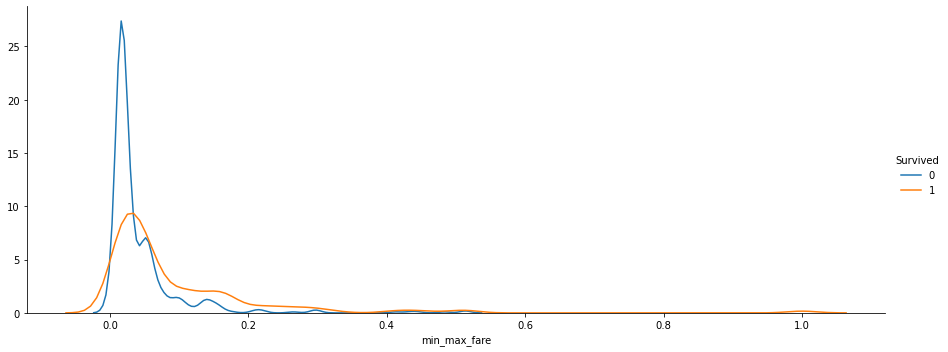

In [8]:
#manually applying min-max scaler
df['min_max_fare']=[(i-0.0)/(512.3492-0.0) for i in df["Fare"].values]
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "min_max_fare").add_legend()

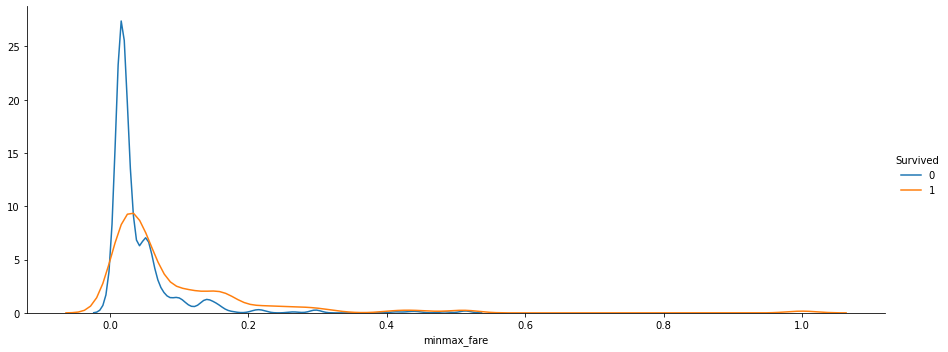

In [11]:
#using sklearn min_max scaler
scaler = MinMaxScaler() 
df["minmax_fare"] = scaler.fit_transform(df["Fare"].values.reshape(-1,1))
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "minmax_fare").add_legend()

<h4><i>b. Standardization</i></h4>

Why?

    Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare 
    measurements that have different units. Variables that are measured at different scales do not contribute equally 
    to the analysis and might end up creating a bais.

When?

    Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be 
    true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when 
    your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian 
    distribution, such as linear regression, logistic regression, and linear discriminant analysis.
    
Technique?

    standardization (or Z-score normalization) means centering the variable at zero and standardizing the variance at 1. 
    The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

    The result of standardization is that the features will be rescaled so that they’ll have the properties of a standard
    normal distribution with
                                    μ=0 and σ=1
                                    
    where μ is the mean (average) and σ is the standard deviation from the mean.

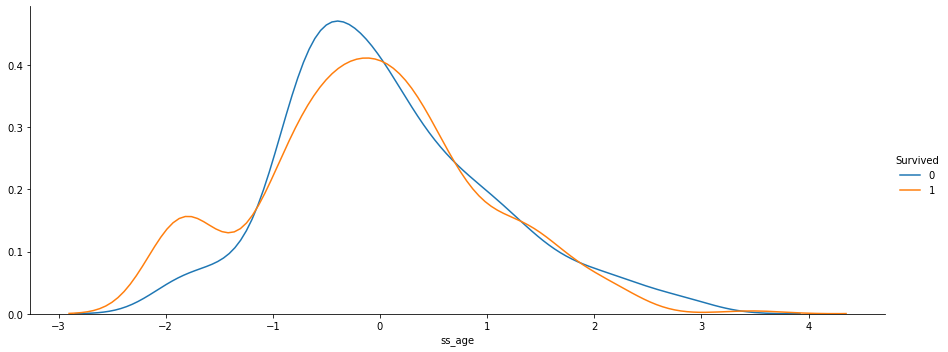

In [12]:
#manually applying standard scaler
df['ss_age']=[((i - df["Age"].mean())/df["Age"].std()) for i in df["Age"].values]
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "ss_age").add_legend()

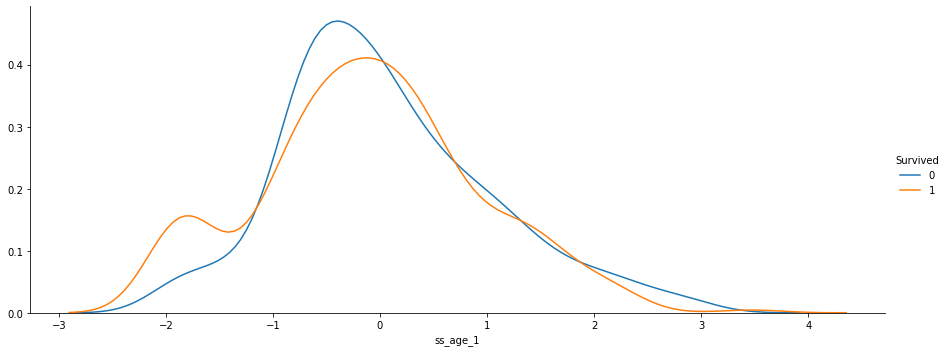

In [13]:
#applying standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df["ss_age_1"] = scaler.fit_transform(df["Age"].values.reshape(-1,1))
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "ss_age_1").add_legend()

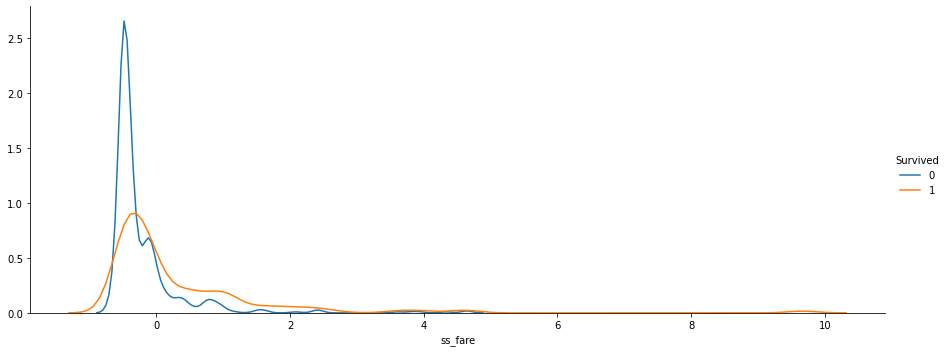

In [14]:
#manually applying standard scaler
df['ss_fare'] = [((i - df["Fare"].mean())/df["Fare"].std()) for i in df["Fare"].values]
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "ss_fare").add_legend()

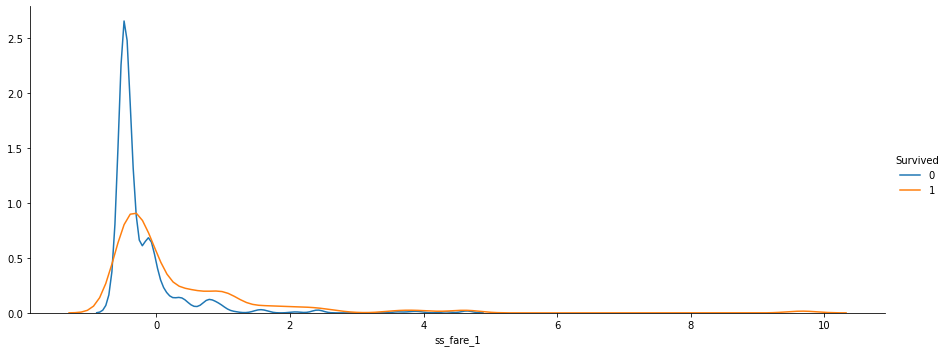

In [15]:
#applying standard scaler
scaler = StandardScaler() 
df['ss_fare_1'] = scaler.fit_transform(df["Fare"].values.reshape(-1,1))
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "ss_fare_1").add_legend()

<h4><i>c. Robust Scaler</i></h4>

Why?

    Robust Scaler transforms the feature vector by substracing the median and then dividing by the interquartile range
    (25%-75%). Like MinMaxScaler, our feature with large values — normal-big — is now of similar scale to the other 
    features. 
    Note: - RobustScaler does not scale the data into a predetermined interval like MinMaxScaler. The range for each 
    feature after RobustScaler is applied is larger than it was for MinMaxScaler.
    
When?

    RobustScaler is used when we want to reduce the effects of outliers, relative to MinMaxScaler.
    
Technique?

    It is applied on below formula.
    
                        X_robust = (X - X_median)/(X_75% - X_25%) 

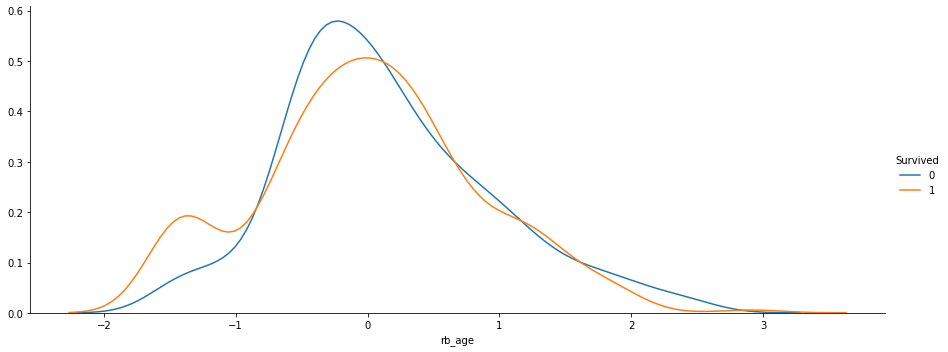

In [16]:
#applying sklearn robust scaler
from sklearn.preprocessing import RobustScaler

rb_scl = RobustScaler()
df["rb_age"] = rb_scl.fit_transform(df["Age"].values.reshape(-1,1))
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "rb_age").add_legend()

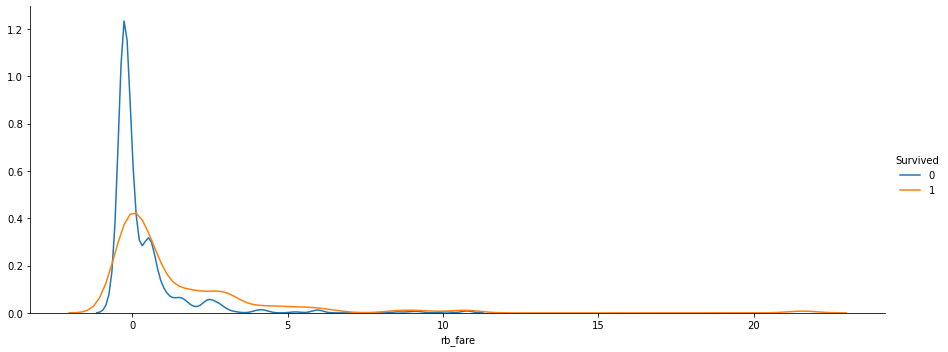

In [17]:
rb_scl = RobustScaler()
df["rb_fare"] = rb_scl.fit_transform(df["Fare"].values.reshape(-1,1))
sns.FacetGrid(df, hue="Survived", height=5, aspect=2.5).map(sns.kdeplot, "rb_fare").add_legend()

<h4><i>d. Normalizer</i></h4>

    Normalize samples individually to unit norm. Each sample (i.e. each row of the data matrix) with at least one non 
    zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
    
    By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. Unit 
    norm with L2 means that if each element were squared and summed, the total would equal 1. Alternatively, L1 (aka 
    taxicab or Manhattan) normalization can be applied instead of L2 normalization.
    
    Normalizer does transform all the features to values between -1 and 1.
    
    Note: Normalizer works on the rows, not the columns!

<h3>2. Categorical</h3>

    Categroical data/variables are usually represented as "strings", "categories" etc and are finite numbers. Some of the 
    examples are:
    
    1. Grades of a student : 0, E, A, B, C, D, F
    2. Degrees of a student : High School, Diploma, Graduation, Masters, Phd etc.
    3. Blood Group : A, A+, A-, B, B+, B- etc
    
    We can further divide the categorical data into 2 sets. 
    1. Ordinal Data
    2. Nominal Data
    
    1. Ordinal Data
    
        Ordinal Data are the categories which have an inherent orders. It retains the information regarding the order in
        which the category is provied. Like the degrees of a student in his career he possessed. One can't get a Phd degree
        without a high school degree etc.
        
    2. Nominal Data
    
        Nominal Data are the categories which doen't have an inherent order. It can be anything a list of blood groups, a 
        list of city, states etc.
        
    There are several ways present to encode a data and we are going to discuss below.
    
<b><i>1. Label Encoding</i></b>

        Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable 
        form. Machine learning algorithms can then decide in a better way on how those labels must be operated. 
           
        Suppose we have a weight feature which has label like under-weight, fit and obese. So label encoder will convert
        these unique values into some interger such as 0,1 and 2.

In [18]:
#applying label encoder to categorical "sex data
from sklearn.preprocessing import LabelEncoder

#original values
print(df["Sex"].unique())

lb_enc = LabelEncoder()
df["lb_sex"] = lb_enc.fit_transform(df["Sex"].values)
#getting unique values
print(df["lb_sex"].unique())

['male' 'female']
[1 0]


<b>Limitation Of Label Encoding</b>

    Label encoding convert the data in machine readable form, but it assigns a unique number(starting from 0) to each 
    class of data. This may lead to the generation of priority issue in training of data sets. A label with high value 
    may be considered to have high priority than a label having lower value.

<b><i>2. One hot Encoding</i></b>

    In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped 
    with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence 
    of that category. These newly created binary features are known as Dummy variables. The number of dummy variables 
    depends on the levels present in the categorical variable. 

In [19]:
"""Count Vectorizer will create a sparse matrix as many of the values are going to be zero in the matrix. We can convert them
into an array using toarray() function."""

from sklearn.feature_extraction.text import CountVectorizer

#original values
print(df["Sex"].unique())

cnt_vct = CountVectorizer()
matrix = cnt_vct.fit_transform(df["Sex"].values)

#converting sparse matrix into an array
matrix.toarray()

['male' 'female']


array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=int64)

<b><i>3. Response Encoding</i></b>

        Here we represent the probability of the data point belonging to a particular class given a category. So for a 
        K-class classification problem, we get K new features which embed the probability of the datapoint belonging to 
        each class based on the value of categorical data. Mathematically speaking, we calculate 
        
                    P(class=X | category=A) = P(category=A ∩ class=X) / P(category=A)

In [109]:
#we are selectig only Sex column for response encoding
df_new = df[["Sex","Survived"]]

#getting 
pos_male=0; neg_male=0; pos_female=0; neg_female=0
for i,j in zip(df_new["Sex"].values, df_new["Survived"].values):
    if i == "male" and j==1:
        pos_male += 1
    elif i == "male" and j==0:
        neg_male += 1
    elif i == "female" and j==1:
        pos_female += 1
    elif i == "female" and j==0:
        neg_female += 1

#total values
total_male = pos_male + neg_male
total_female = pos_female + neg_female

#number
num_pos_male = pos_male/total_male
num_neg_male = neg_male/total_male
num_pos_female = pos_female/total_female
num_neg_female = neg_female/total_female

Sex_pos = list(); Sex_neg = list()
for i in df_new["Sex"].values:
    if i == "male":
        Sex_pos.append(num_pos_male); Sex_neg.append(num_neg_male)
    elif i == "female":
        Sex_pos.append(num_pos_female); Sex_neg.append(num_neg_female)
        
df_new["Sex_pos"] = pd.Series(Sex_pos)
df_new["Sex_neg"] = pd.Series(Sex_neg)

df_new.head()

,Sex,Survived,Sex_pos,Sex_neg
0,male,0,0.188908,0.811092
1,female,1,0.742038,0.257962
2,female,1,0.742038,0.257962
3,female,1,0.742038,0.257962
4,male,0,0.188908,0.811092


<b><i>Here I have covered only the known encoding methods which is used more often. I will try to add more method in future.</i></b>